In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [2]:
for col in education_df:
    if (education_df[col].isnull().sum()*100/education_df[col].isnull().count() > 0.0 and
        education_df[col].isnull().sum()*100/education_df[col].isnull().count() < 20.0):
            education_df[col].interpolate()

education_df.dropna(inplace=True)  

In [7]:
# 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

education_df.describe()

# Enrollment across grade levels doesnt vary too greatly
# Mean expenditure is greater than mean revenue

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,413.000000,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,...,413.000000,413.000000,413.000000,4.130000e+02,4.130000e+02,4.130000e+02,413.000000,413.000000,413.000000,413.000000
mean,2007.506053,9.316231e+05,1.034494e+07,9.301811e+05,4.773503e+06,4.641260e+06,1.045228e+07,5.406896e+06,3.051818e+06,4.731830e+05,...,71371.498789,72044.101695,63246.944310,5.756174e+05,2.821265e+05,8.799402e+05,236.637519,279.549818,219.327490,263.569562
std,5.250806,1.092799e+06,1.267821e+07,1.288070e+06,5.881500e+06,5.984117e+06,1.293025e+07,6.807702e+06,3.589109e+06,5.645585e+05,...,83930.725870,83803.409879,73955.462697,6.757171e+05,3.305371e+05,1.032314e+06,9.010167,9.619134,7.594926,6.947037
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2003.000000,2.794560e+05,2.654366e+06,2.593900e+05,1.431621e+06,9.416830e+05,2.623966e+06,1.402305e+06,8.042530e+05,1.279680e+05,...,20480.000000,20834.000000,18519.000000,1.666180e+05,8.180900e+04,2.594170e+05,231.953435,274.305090,214.929887,259.417376
50%,2007.000000,6.651090e+05,6.029807e+06,5.352230e+05,2.962151e+06,2.342892e+06,6.175724e+06,3.166208e+06,1.856055e+06,3.239130e+05,...,50899.000000,50186.000000,41118.000000,4.058170e+05,1.866620e+05,6.249790e+05,238.302675,281.407120,220.833428,265.050858
75%,2011.000000,1.014577e+06,1.190594e+07,1.014556e+06,5.970302e+06,5.233700e+06,1.146206e+07,6.006275e+06,3.551036e+06,5.469260e+05,...,79078.000000,80850.000000,74749.000000,6.384470e+05,3.213130e+05,9.687310e+05,242.664321,286.102742,224.508278,268.200596
max,2015.000000,6.307022e+06,7.395890e+07,9.990221e+06,4.233364e+07,3.494151e+07,7.476609e+07,4.195426e+07,2.169368e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,277.191363


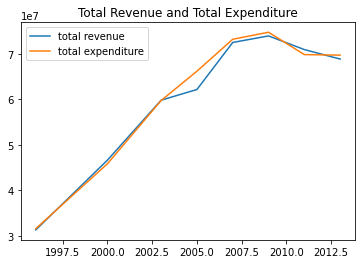

In [8]:
# 2. Choose a state (such as California) and draw a line graph of its total revenues and total 
# expenditures over the years. How do these two variables evolve during these years? Try to 
# explain the peaks and troughs with some state-wise news and information around those dates.

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label = "total revenue")

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label = "total expenditure")

plt.title("Total Revenue and Total Expenditure")
plt.legend()
plt.show()

# Without going and researching the topic, the notable moments in the graph happen around 
# presidential elections which do have quite an impact on budgets and spendings of
# variances departments.

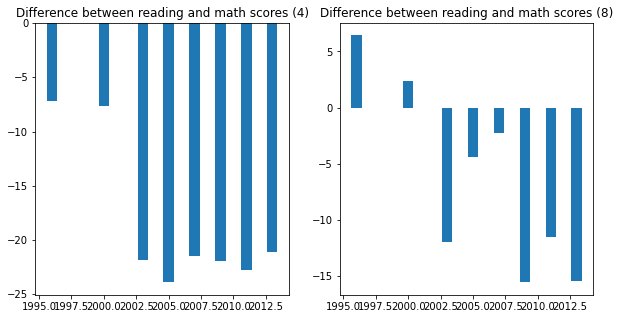

Difference between reading and math scores (4)
213     -7.216492
420     -7.648537
576    -21.822545
680    -23.854931
784    -21.511905
891    -21.912522
997    -22.806357
1101   -21.108497
dtype: float64
Difference between reading and math scores (8)
213      6.424972
420      2.323040
576    -11.976121
680     -4.373619
784     -2.222356
891    -15.553342
997    -11.484551
1101   -15.453063
dtype: float64


In [9]:
# 3. In your chosen state, in which of the lessons are the students more successful—math or reading?

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])

plt.title("Difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("Difference between reading and math scores (8)")

plt.show()

print("Difference between reading and math scores (4)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("Difference between reading and math scores (8)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

# Students are generally better at math in California

Text(0.5, 1.0, 'Histogram of AVG_MATH_8_SCORE')

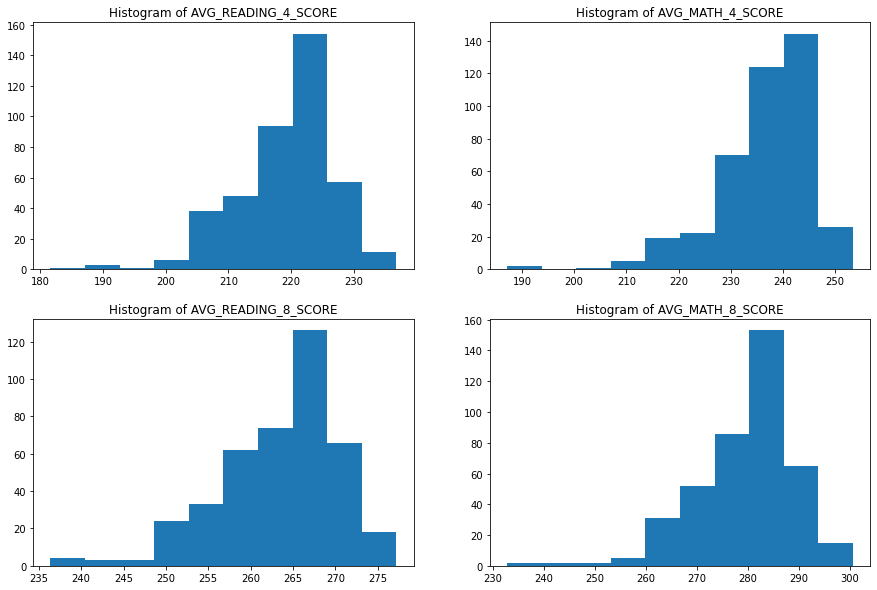

In [11]:
# 4. What are the distributions of the math and reading scores in the sample?

plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_8_SCORE"))

# Non-normal, Left skewed

Text(0.5, 1.0, 'Histogram of AVG_READING_8_SCORE (filled with mean)')

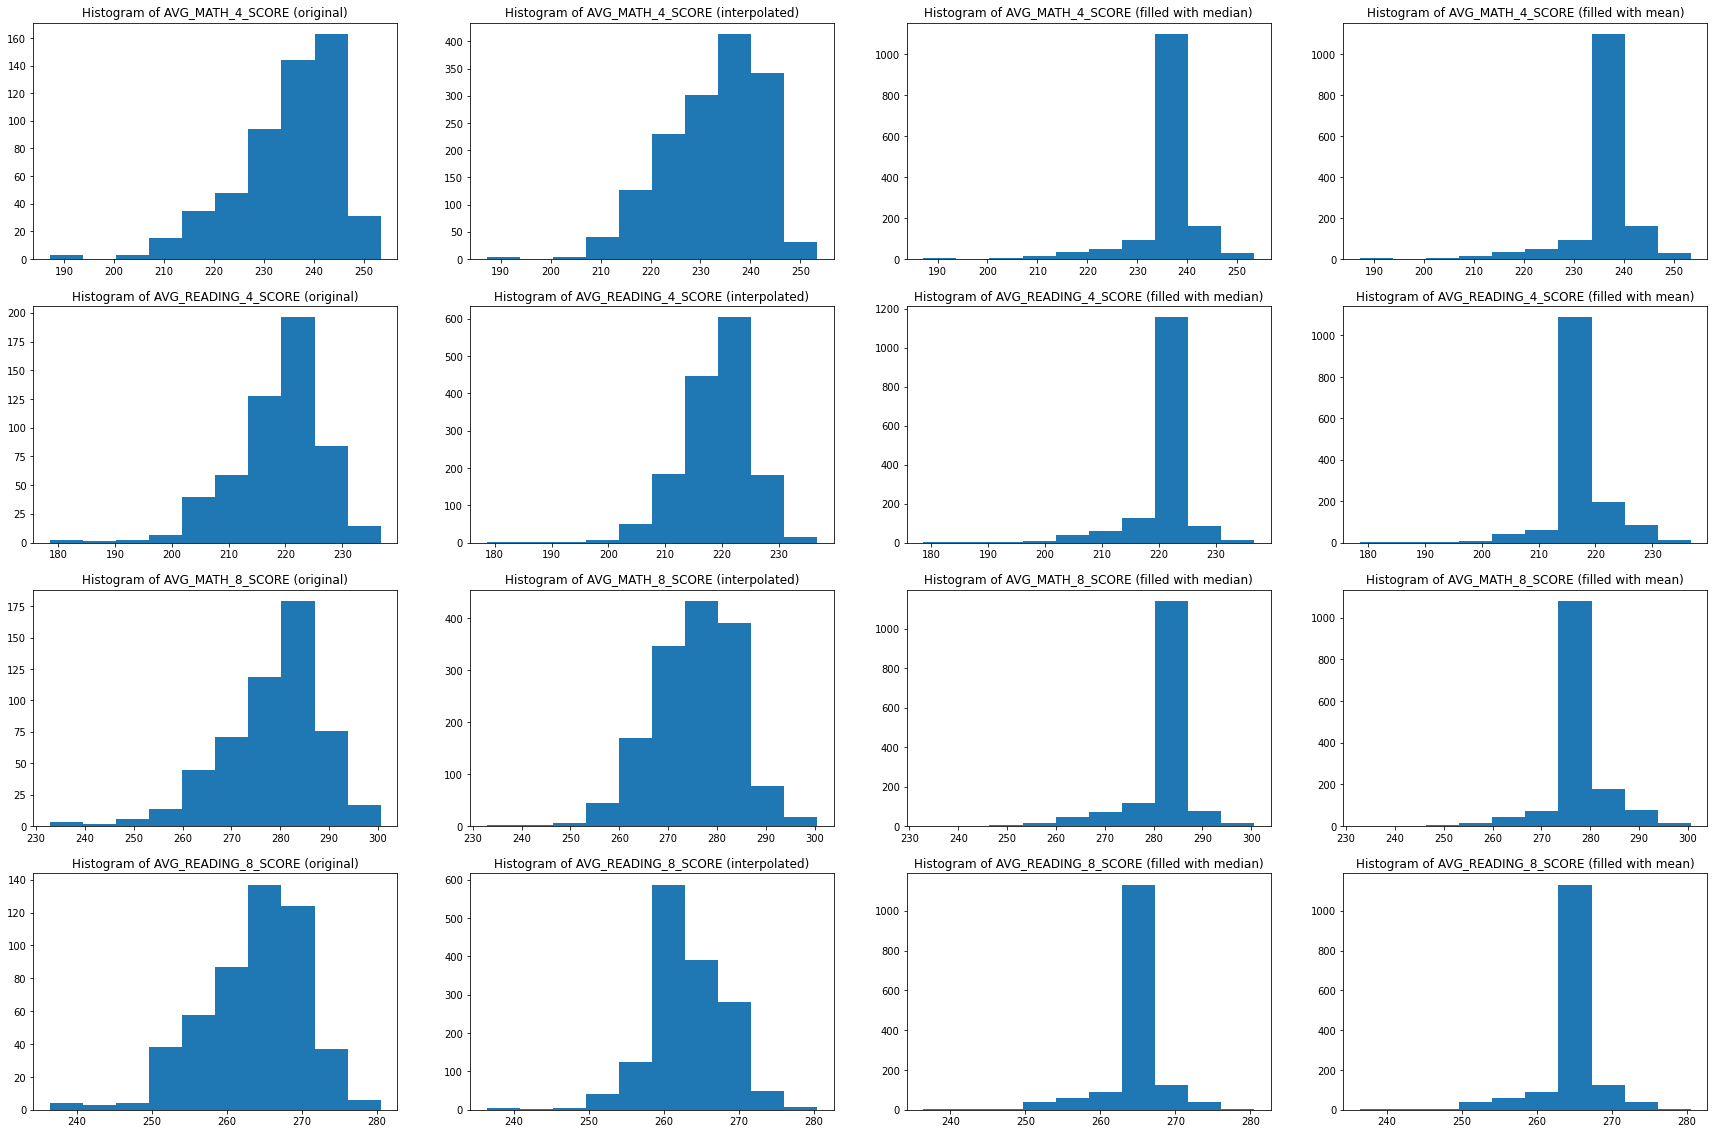

In [17]:
# 5. Now, look again at the original dataset (before you filled in the missing values). Notice 
# there are too many missing values for math and reading scores. Fill out the missing values 
# using mean, median, and linear interpolation. Then, compare the effects of these techniques on 
# the distributions of the score variables.

plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("Histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

# How we can percieve the data changes drastically depending on how the data is filled
# theres a lot of missing data so in those cases things like mean and mode are not going
# to provide great results and interpolation is gonna be far better.